Assignment 02

Index : 190356E

Name : N.D.Liyanage

Github : https://github.com/NaduniDamsariLiyanage/en_2550

Question 01

269.990559370947
35.68355506197024


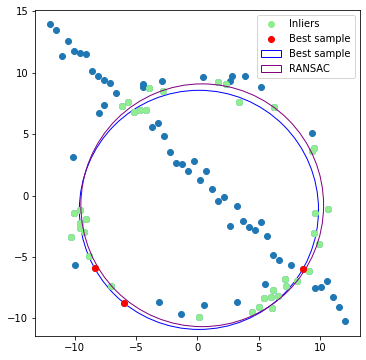

In [23]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy import linalg
import random

def ShortestDistance(p,centerx,centery,radius):
    d= np.array(abs(((p[:,0]-centerx)**2+(p[:,1]-centery)**2)**0.5-radius))
    return d

def Circlefinder(pt1, pt2, pt3):
    temp = pt2[0]**2 + pt2[1]**2
    bc = (pt1[0]**2 + pt1[1]**2 - temp)/2
    cd = (temp - pt3[0]**2 - pt3[1]**2)/2
    det = (pt1[0] - pt2[0]) * (pt2[1] - pt3[1]) - (pt2[0] - pt3[0]) * (pt1[1] - pt2[1])
    if abs(det) < 1.0e-10:
        return None
    c_x = (bc*(pt2[1] - pt3[1]) - cd*(pt1[1] - pt2[1]))/ det
    c_y = ((pt1[0] - pt2[0]) * cd - (pt2[0] - pt3[0])*bc)/ det
    r = ((c_x - pt1[0])**2 + (c_y - pt1[1])**2)**0.5

    return c_x, c_y, r

def CirclePlotting(Data,Datalist,color='y'):
    cen_x, cen_y, radius = Circlefinder(Datalist[Data[0]],Datalist[Data[1]],Datalist[Data[2]])
    c = plt.Circle((cen_x, cen_y), radius, fill=False)
    c.set_color(color)
    return c

def RANSAC(Data,iteration,thresh,NoOfInlier):
    maximum = 0
    output = np.array([])
    for i in range(iteration):
        randomPoints = np.random.choice(Data.size//2, size=3, replace=False)
        cen_x, cen_y, radius = Circlefinder(Data[randomPoints[0]],Data[randomPoints[1]],Data[randomPoints[2]])
        PO = ShortestDistance(Data, cen_x, cen_y, radius)

        if radius > max(Data[:,1])*1.5:
            continue
        inliers = Data[PO < thresh]

        if len(inliers) > NoOfInlier:
               
            shrt_d = ShortestDistance (inliers,cen_x,cen_y,radius)
            mean = sum(shrt_d/shrt_d.size)
            if maximum < len(inliers):
                best = mean
                output = randomPoints
                inli = inliers
            elif maximum == len(inliers) and best > mean:
                best = mean
                output = randomPoints
                inli = inliers
    print(radius)
    return output,inli

# np . random. seed ( 0 )
N = 100
half_n = N//2
r = 10
s = r /16
t = np . random. uniform(0 , 2*np . pi , half_n )
n = s*np . random. randn ( half_n )
x , y = ( r + n)*np . cos ( t ) , ( r + n)*np . sin ( t )
X_circ = np . hstack ( ( x . reshape ( half_n , 1 ) , y.reshape ( half_n , 1 ) ) )
m, b = -1, 2
x = np.linspace (-12, 12 , half_n )
y = m*x + b + s*np.random.randn(half_n)
X_line = np . hstack ( ( x . reshape ( half_n , 1 ) , y.reshape ( half_n , 1 ) ) )
X = np . vstack ( ( X_circ , X_line ) )

ranL, bestInlier = RANSAC(X,500,1,40)         
circ1 = CirclePlotting(ranL,X, color = 'blue')
fig, ax = plt.subplots(figsize=(6,6))
ax.set_aspect(1)
ax.add_artist(circ1)
p1 = ax.scatter(X[:,0],X[:,1])
Inliers = ax.scatter(bestInlier[:,0],bestInlier[:,1], color='lightgreen' )
bestfit, inl = RANSAC(bestInlier,50,1,bestInlier.size//2.2)
circ2 = CirclePlotting(bestfit,bestInlier, color ='purple')
ax.add_artist( circ2 )
Y = np.vstack((X[ranL[0]],X[ranL[1]],X[ranL[2]]))
Bestsamples = ax.scatter(Y[:,0],Y[:,1], c = 'r')
plt.legend(handles=[Inliers,Bestsamples,circ1,circ2],labels=['Inliers','Best sample','Best sample','RANSAC'])
plt.show()


RANSAC algorithms use randomly selected samples for fitting. Three point coordinates are randomly choosen and, circle which go through those points is drawn using geometry. A threshold value is set to determine inliers and outliers. the fitting circle is selected by considering the number of inliers.

Question 02

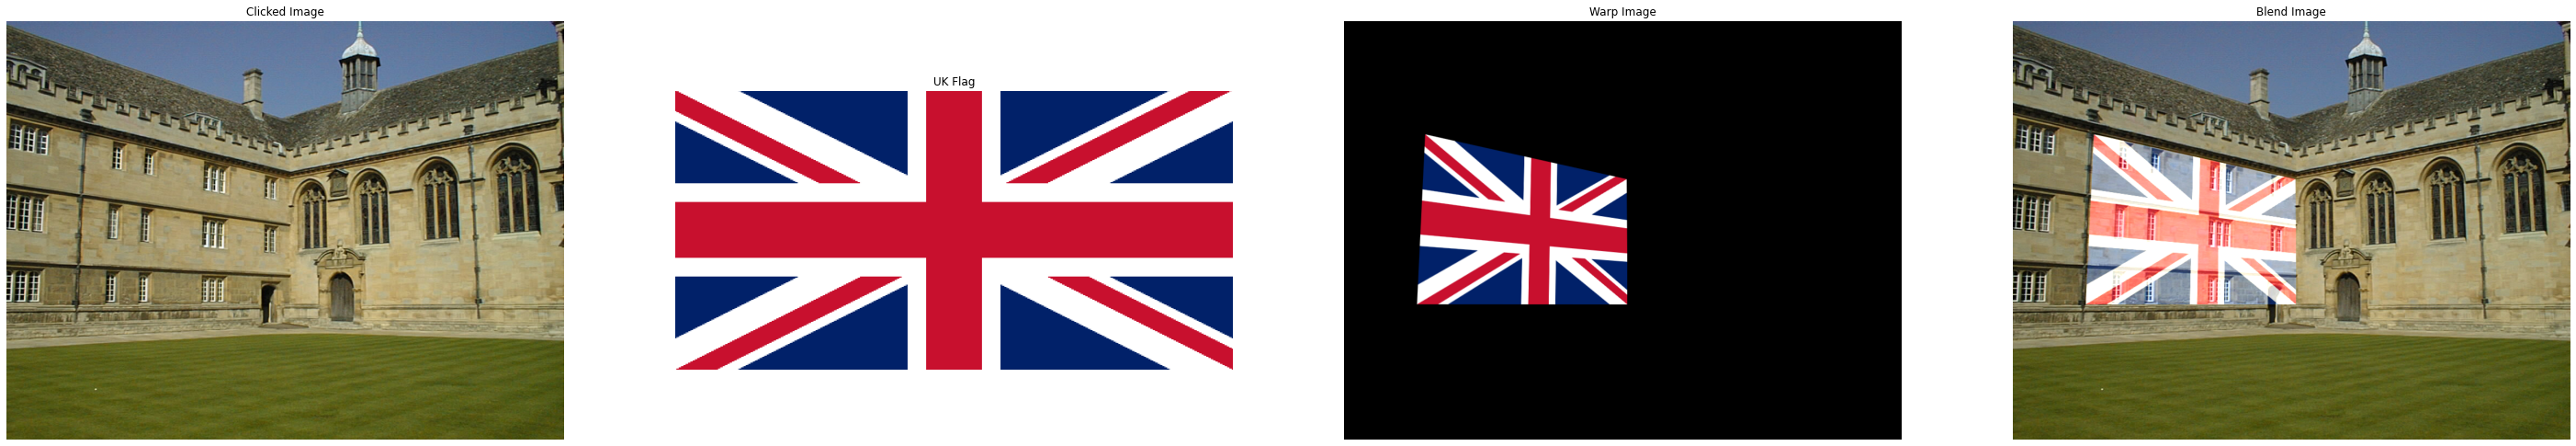

In [19]:
count = 0
points = []
width = 0
height = 0

arch_img1 = cv.imread(r'./assingment2_images/001.jpg', cv.IMREAD_COLOR)
arch_img2 = cv.imread(r'./assingment2_images/003.jpg', cv.IMREAD_COLOR)
imgflag = cv.imread(r'./assingment2_images/Flag_of_the_United_Kingdom.svg.png', cv.IMREAD_REDUCED_COLOR_4)
img1 = arch_img1
img2 = arch_img2
def mousePoints(event, x, y, flags, params):
    global count
    global points
    if count < 4:
        if event == cv.EVENT_LBUTTONDOWN:
            points.append((x, y))
            count += 1
    return None
def getshape(pts):
    global width
    global height
    width = (abs(pts[0][0] - pts[1][0]) + abs(pts[2][0] - pts[3][0]))//2
    height = (abs(pts[0][1] - pts[2][1]) + abs(pts[1][1] - pts[3][1]))//2
    return width, height
cv.imshow("original image", arch_img1)
cv.setMouseCallback("original image", mousePoints)
cv.waitKey(0)
cv.destroyAllWindows() 

pts_src = np.array([[0,0], [imgflag.shape[1],0], [0, imgflag.shape[0]], [imgflag.shape[1],imgflag.shape[0]]]) 
pts_dst = np.array(points)
shape0, shape1 = getshape(points)

h , status = cv.findHomography(pts_src, pts_dst,cv.RANSAC, 5.0)
output_imge = cv.warpPerspective(imgflag, h, (arch_img1.shape[1], arch_img1.shape[0]))
blend_image = cv.addWeighted(arch_img1, 0.95, output_imge, 0.8, 0.0)

fig, ax = plt.subplots(1,4, figsize = (50,10))
ax[0].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB)), ax[0].set_title("Clicked Image"), ax[0].axis('off') 
ax[1].imshow(cv.cvtColor(imgflag, cv.COLOR_BGR2RGB)), ax[1].set_title("UK Flag"), ax[1].axis('off') 
ax[2].imshow(cv.cvtColor(output_imge, cv.COLOR_BGR2RGB)), ax[2].set_title("Warp Image"),ax[2].axis('off')
ax[3].imshow(cv.cvtColor(blend_image, cv.COLOR_BGR2RGB)), ax[3].set_title("Blend Image"), ax[3].axis('off')
plt.show()

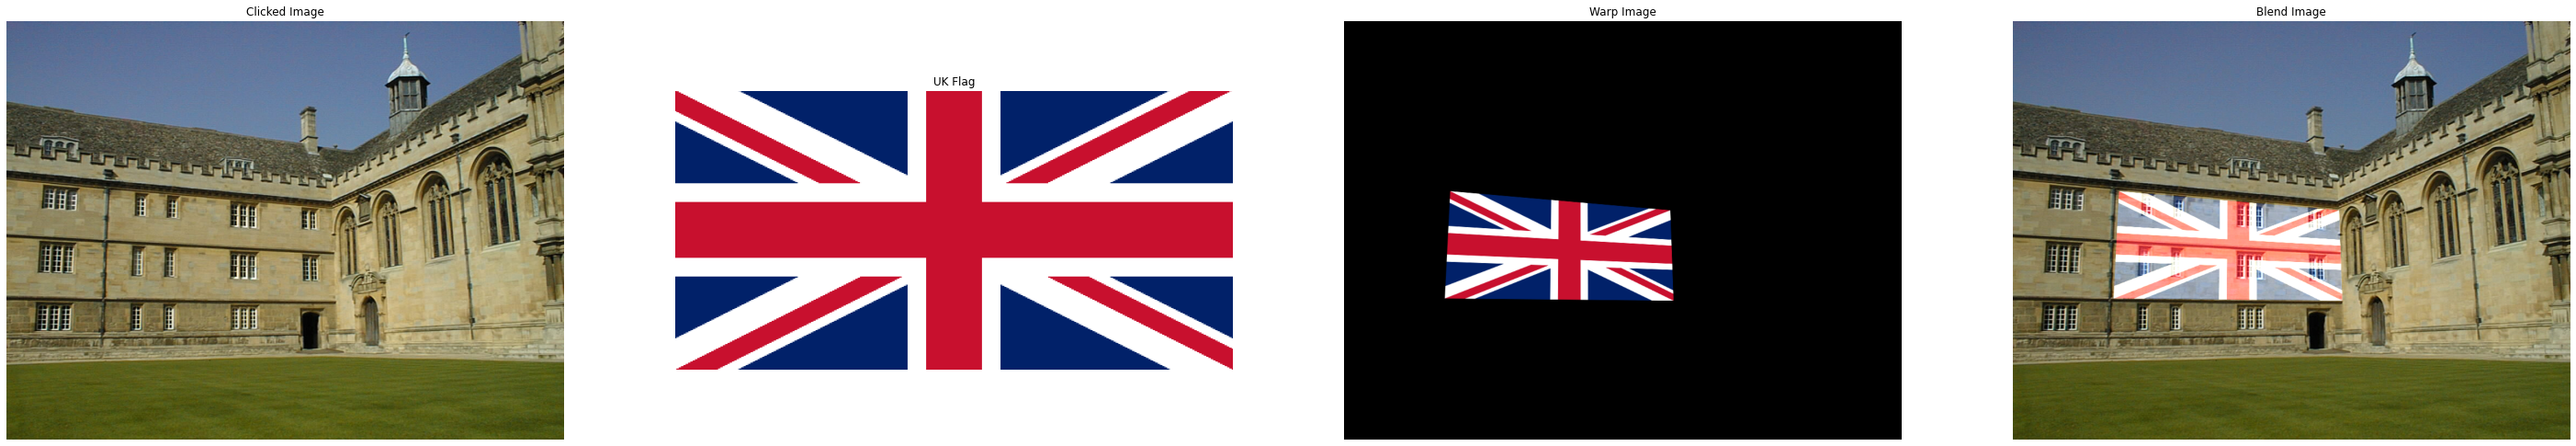

The mousePoints function returns four coordinates clicked by the user. To calculate the hormography inbuilt function 'cv.findHomography()' is used. Blending of the images is done by using 'cv2.addWeighted()' inbuilt function. 

Question 03

SIFT features between the two images are matched by using following code.

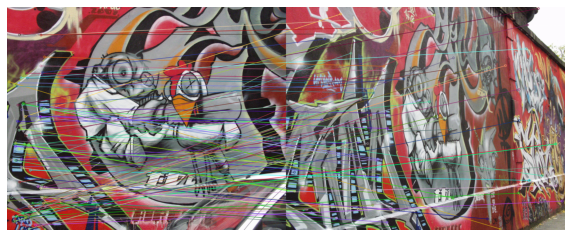

In [27]:
# read images
img1 = cv.imread(r'./assingment2_images/img1.ppm',cv.IMREAD_COLOR)
img2 = cv.imread(r'./assingment2_images/img2.ppm',cv.IMREAD_COLOR)
img3 = cv.imread(r'./assingment2_images/img3.ppm',cv.IMREAD_COLOR)
img4 = cv.imread(r'./assingment2_images/img4.ppm',cv.IMREAD_COLOR)  
img5 = cv.imread(r'./assingment2_images/img5.ppm',cv.IMREAD_COLOR) 
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)
img4 = cv.cvtColor(img4, cv.COLOR_BGR2RGB)
img5 = cv.cvtColor(img5, cv.COLOR_BGR2RGB)
#3(a)
sift = cv.SIFT_create(nfeatures=0,nOctaveLayers=3,contrastThreshold=0.04,edgeThreshold=10,sigma=1.6) #sift
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img5,None)
bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)    #feature matching
matches = bf.match(descriptors_1,descriptors_2)
sortmatches = sorted(matches, key = lambda x:x.distance)
img6 = cv.drawMatches(img1, keypoints_1, img5, keypoints_2, matches[:100], img5, flags=2)
fig, ax = plt.subplots(figsize = (10, 10))
ax.imshow(img6)
ax.axis('off')
plt.show()

It is hard to calculate the homography of the image 1 to 5 direcrly. So it is calculated seperately using homographies of img1.ppm to img2.ppm, img2.ppm to img3.ppm, img3.ppm to img4.ppm and img4.ppm to img.ppm. 

[[ 6.64241122e-01  9.90338356e-02  2.10190687e+02]
 [ 2.60614456e-01  1.20323113e+00 -3.52288016e+01]
 [ 5.66038650e-04 -1.24868144e-05  1.00219730e+00]]


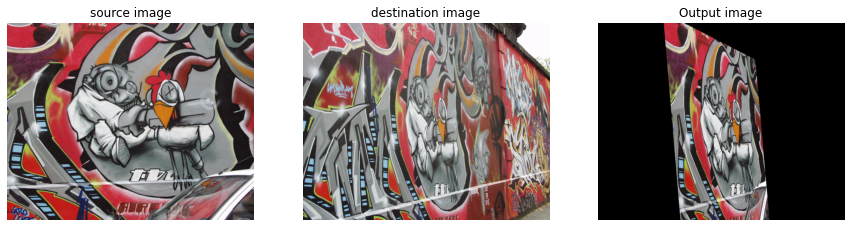

In [30]:
def SIFT(img1,img2):
    sift = cv.SIFT_create(nfeatures=0,nOctaveLayers=3,contrastThreshold=0.04,edgeThreshold=10,sigma=1.6) #sift
    keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)
    bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)    #feature matching
    matches = bf.match(descriptors_1,descriptors_2)
    sortmatches = sorted(matches, key = lambda x:x.distance)
    return matches,[keypoints_1,keypoints_2]
def geoDistance(correspondence, h):
    p1 = np.transpose(np.matrix([correspondence[0].item(0), correspondence[0].item(1), 1]))
    estimatep1 = np.dot(h, p1)
    estimatep2 = (1/estimatep1.item(2))*estimatep1
    p2 = np.transpose(np.matrix([correspondence[0].item(2), correspondence[0].item(3), 1]))
    error = p2 - estimatep2
    return np.linalg.norm(error)

def Homography_calc(correspondences):
    #loop through correspondences and create assemble matrix
    Lst = []
    for corr in correspondences:
        p1 = np.matrix([corr.item(0), corr.item(1), 1])
        p2 = np.matrix([corr.item(2), corr.item(3), 1])

        a2 = [0, 0, 0, -p2.item(2) * p1.item(0), -p2.item(2) * p1.item(1), -p2.item(2) * p1.item(2),
              p2.item(1) * p1.item(0), p2.item(1) * p1.item(1), p2.item(1) * p1.item(2)]
        a1 = [-p2.item(2) * p1.item(0), -p2.item(2) * p1.item(1), -p2.item(2) * p1.item(2), 0, 0, 0,
              p2.item(0) * p1.item(0), p2.item(0) * p1.item(1), p2.item(0) * p1.item(2)]
        Lst.append(a1)
        Lst.append(a2)

    matrixA = np.matrix(Lst)
    u, s, v = np.linalg.svd(matrixA) #svd composition
    h = np.reshape(v[8], (3, 3)) #reshape the min singular value into a 3 by 3 matrix
    h = (1/h.item(8)) * h #normalize and now we have h
    return h
def RANSAC(corr, thresh):
    maxInliers = []
    finalH = None
    for i in range(1000):
        #find 4 random points to calculate a homography
        corr1 = corr[random.randrange(0, len(corr))]
        corr2 = corr[random.randrange(0, len(corr))]
        randomFour = np.vstack((corr1, corr2))
        corr3 = corr[random.randrange(0, len(corr))]
        randomFour = np.vstack((randomFour, corr3))
        corr4 = corr[random.randrange(0, len(corr))]
        randomFour = np.vstack((randomFour, corr4))

        #call the homography function on those points
        h = Homography_calc(randomFour)
        inliers = []

        for i in range(len(corr)):
            d = geoDistance(corr[i], h)
            if d < 5:
                inliers.append(corr[i])

        if len(inliers) > len(maxInliers):
            maxInliers = inliers
            finalH = h
        
        if len(maxInliers) > (len(corr)*thresh):
            break
    return finalH, maxInliers
def corr_list(matches,key):
    correspondenceList1 = []
    keypoints1 = [key[0],key[1]]
    for match in matches:
        (x1, y1) = keypoints1[0][match.queryIdx].pt
        (x2, y2) = keypoints1[1][match.trainIdx].pt
        correspondenceList1.append([x1, y1, x2, y2])
    return correspondenceList1

match1,kyp1= SIFT (img1,img2)
correspondenceList1=corr_list(match1,kyp1)
corrs1 = np.matrix(correspondenceList1)
finalH1, inliers1 = RANSAC(corrs1, 0.6)
match2,kyp2=SIFT(img2,img3)
correspondenceList2=corr_list(match2,kyp2)
corrs2 = np.matrix(correspondenceList2)
finalH2, inliers2 = RANSAC(corrs2, 0.6)
match3,kyp3=SIFT(img3,img4)
correspondenceList3=corr_list(match3,kyp3)
corrs3 = np.matrix(correspondenceList3)
finalH3, inliers3 = RANSAC(corrs3, 0.6)
match4,kyp4=SIFT(img4,img5)
correspondenceList4=corr_list(match4,kyp4)
corrs4 = np.matrix(correspondenceList4)
finalH4, inliers4 = RANSAC(corrs4, 0.6)
H = finalH4 @ finalH3 @ finalH2 @ finalH1
print(H)

dst1 = cv.warpPerspective(img1, H, ((img5.shape[1]), img5.shape[0]))
fig, ax = plt.subplots(1,3,figsize = (15,15))
ax[0].imshow(img1), ax[0].set_title("source image")
ax[1].imshow(img5), ax[1].set_title("destination image")
ax[2].imshow(dst1), ax[2].set_title("Output image")
for i in range(3): ax[i].axis('off')
plt.show()

Comparing actual homography and calculated homography using RANSAC algorithm. Accuracy is calculated by sum of square difference between two matrices.

In [39]:
HomographyCalc = [[ 6.51222636e-01 , 7.03255113e-02 , 2.20540605e+02],
 [ 2.31063212e-01 , 1.19780873e+00, -2.55386339e+01],
 [ 5.43289009e-04, -4.18605266e-06 , 1.00140169e+00]]
HomographyOrig = [ [6.2544644e-01,5.7759174e-02,2.2201217e+02],
   [2.2240536e-01,1.1652147e+00,-2.5605611e+01],
   [4.9212545e-04,-3.6542424e-05,1.0000000e+00]]

HomographyOrig =np.array(HomographyOrig)
HomographyCalc = np.array(HomographyCalc)

SSD_Calc= np.sum(np.sum((HomographyOrig-HomographyCalc)*(HomographyOrig-HomographyCalc)))
print("SSD Value =",SSD_Calc)

SSD Value = 2.171951103855168


Stitching img1.ppm onto img5.ppm

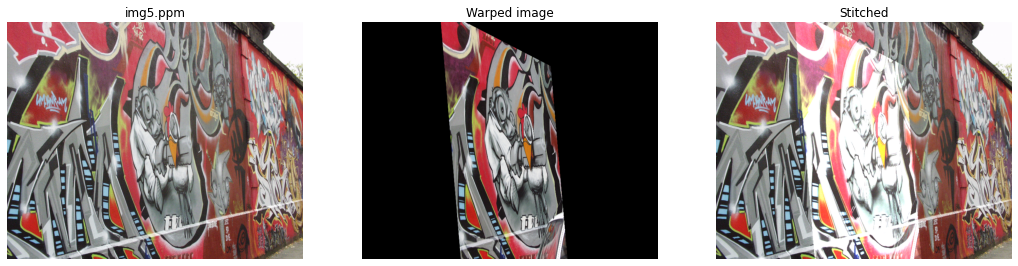

In [40]:
img_p = cv.warpPerspective(img1, H, (img5.shape[1], img5.shape[0]))
img_blended = cv.addWeighted(img5, 1, img_p, 1, 0)

fig, ax = plt.subplots(1, 3, figsize=(18, 15))
ax[0].imshow(img5), ax[0].set_title("img5.ppm"), ax[0].axis("off")
ax[1].imshow(img_p), ax[1].set_title("Warped image"), ax[1].axis("off")
ax[2].imshow(img_blended), ax[2].set_title("Stitched"), ax[2].axis("off")
plt.show()